# Intro to ScikitLearn
# what are we going to cover?

0. an end to end scikit-learn workflow  
1. getting data ready  
2. choose the right algorithem for out problems  
3. fit the model / algorithm and use it to make prediction on out data  
4. Evaluating a model  
5. improve a model  
6. save and load a trained model  
7. putting it all together  



# 0. an end to end scikit-learn workflow

In [1]:
# 1.Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X(feautures matrix)
X = heart_disease.drop("target",axis=1)

# Create Y(labels)
Y = heart_disease["target"]

In [3]:
#2. Choose the right model and hyperparameters
import sklearn
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
#3 . Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [5]:
clf.fit(X_train,y_train);

In [6]:
#make a predictions
y_label = clf.predict(np.array([0,2,3,4]))
#array doesn't look like test subjects(inputs) so we get the error 

C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [8]:
y_test

221    0
288    0
116    1
139    1
121    1
      ..
176    0
225    0
52     1
29     1
74     1
Name: target, Length: 61, dtype: int64

In [9]:
# 4. Evaluate the model
clf.score(X_train,y_train)

1.0

In [10]:
clf.score(X_test,y_test)

0.819672131147541

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.86      0.84      0.85        37

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [12]:
confusion_matrix(y_test,y_preds)

array([[19,  5],
       [ 6, 31]])

In [13]:
accuracy_score(y_test,y_preds)

0.819672131147541

In [14]:
#5. Improve a model
# Try diffrent amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%

Trying model with 20 estimators...
Model accuracy on test set: 78.69%

Trying model with 30 estimators...
Model accuracy on test set: 78.69%

Trying model with 40 estimators...
Model accuracy on test set: 78.69%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 78.69%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 80.33%

Trying model with 90 estimators...
Model accuracy on test set: 80.33%



In [15]:
# 6.Save a model and load it
import pickle
pickle.dump(clf,open("Random_forest_model_1.pkl","wb"))

In [16]:
loaded_model = pickle.load(open("Random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.8032786885245902

In [17]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\akash\miniconda3\envs\sklearn-env\python.exe
   machine: Windows-10-10.0.26100-SP0

Python dependencies:
      sklearn: 1.6.1
          pip: 25.1
   setuptools: 78.1.1
        numpy: 2.0.1
        scipy: 1.15.2
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.0
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 6
         prefix: mkl_rt
       filepath: C:\Users\akash\miniconda3\envs\sklearn-env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: C:\Users\akash\miniconda3\envs\sklearn-env\vcomp140.dll
        version: None


## 1. Getting our data ready to bee used with machine learning

Three main things we have to do:
1. Split Data into features and labels(usually `X` & `Y`)
2. Filling (also called imputing) or disregarding missing values
3. converting non-numerical valuess to numerical values(also called feature encoding)

In [18]:
X = heart_disease.drop("target",axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# Split the data in training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,Y,test_size=0.2)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [22]:
X.shape,y.shape

((303, 13), (303,))

### 1.1 Make sure all the data is numerical

In [23]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Split the data in X & Y
X = car_sales.drop("Price",axis=1)
Y = car_sales["Price"]

# Split into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [27]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train) # This will give error because there is no numerical value for Make and Color
model.score(X_test,Y_test)


ValueError: could not convert string to float: 'Toyota'

In [28]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] ## we can take Doors in categories like 3,4,5 etc
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                               remainder ="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [29]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [30]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [31]:
Y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

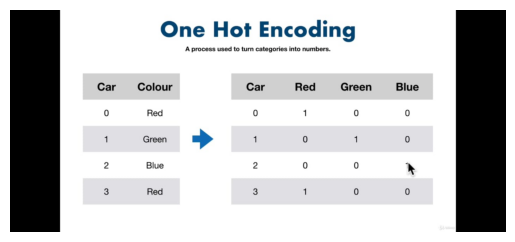

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('data/OneHotEncoder.jpg')  # Replace with your image path
plt.imshow(img)
plt.axis('off')  # Optional: hides axes
plt.show()


In [33]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies


,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [34]:
#Refit the model
np.random.seed(42)
X_train,X_test,Y_train,Y_test = train_test_split(transformed_X,Y,test_size=0.2)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [35]:
model.score(X_test,Y_test)

0.3235867221569877

 ### 1.2 What if there were missing values?
 1. Fill them with some values(also known as imputation)
 2. Remove the samples with missing data altogether

In [36]:
missing_car_sales = pd.read_csv("data/car-sales-extended-missing-data.csv")
missing_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [37]:
missing_car_sales.isna().sum() #Nan = na = missing = blank

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
#Create X and Y
X = missing_car_sales.drop("Price",axis=1)
Y = missing_car_sales["Price"]

In [39]:
# Let's try and convert is to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] ## we can take Doors in categories like 3,4,5 etc
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                               remainder ="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

#### Option:1 - Fill Missing Data with pandas

In [40]:
# Fill the "Make" column
missing_car_sales["Make"] = missing_car_sales["Make"].fillna("missing")
# Fill the "Colour" column
missing_car_sales["Colour"] = missing_car_sales["Colour"].fillna("missing")


# Fill the "Odometer (KM)" column
missing_car_sales["Odometer (KM)"] = missing_car_sales["Odometer (KM)"].fillna(missing_car_sales["Odometer (KM)"].mean())

# Fill the "Doors" column
missing_car_sales["Doors"] = missing_car_sales["Doors"].fillna(4)  # Most cars have 4 doors



In [41]:
missing_car_sales.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [42]:
# Remove row with missing price values(Becuase price is the value that we want to predict so we can't have that missing values)
missing_car_sales.dropna(inplace=True) #only price column has missing values so that will be dropped not other otherwise this function will drop rows with missing values

In [43]:
missing_car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [44]:
len(missing_car_sales)

950

In [45]:
X = missing_car_sales.drop("Price",axis=1)
Y = missing_car_sales["Price"]

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] ## we can take Doors in categories like 3,4,5 etc
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                               remainder ="passthrough")
transformed_X = transformer.fit_transform(missing_car_sales)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option:2 Fill Missing values with scikit learn

In [47]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [48]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
# Drop the rows with missing in the Price column
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [50]:
# Split into X and Y
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing["Price"]

In [51]:
#Fill missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical values with 'missing' numerical values with mean
car_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define Columns
car_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an Imputer(something tha fill missing data)
imputer = ColumnTransformer([
    ("car_imputer",car_imputer,car_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features),
])
# Transform the data
filled_X = imputer.fit_transform(X)
filled_X


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [52]:
car_sales_filled = pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [53]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [54]:
# Let's try and convert is to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] ## we can take Doors in categories like 3,4,5 etc
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                               remainder ="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [55]:
#Now we have got out dadta as number and filled(no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,Y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

In [56]:
len(car_sales_filled),len(car_sales)

(950, 1000)

## 2. Choosing the right estimator / algorithm for out problem
Scikit-learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether a sample it one thing or another (Eg. True/False,Yes/No...)
* Regression - predicting a number

  https://scikit-learn.org/1.5/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression model

In [57]:
# Import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [60]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [61]:
california_df = pd.DataFrame(california["data"],columns=california["feature_names"])
california_df["target"] = pd.Series(california["target"])
california_df.head()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

# print(df.head())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
len(california_df)

20640

In [63]:
## Let's Try the Ridge Regression Model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

#Create the data
X =  california_df.drop("target",axis=1)
Y = california_df["target"]

# split into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

# Instantiate Ridge Mdoel
model = Ridge()
model.fit(X_train,Y_train)

# Check the score of the Ridge model on test data
model.score(X_test,Y_test)

0.5758549611440126

How do we improve this score?

What if Ridge is not working?

Let's refer back to the map
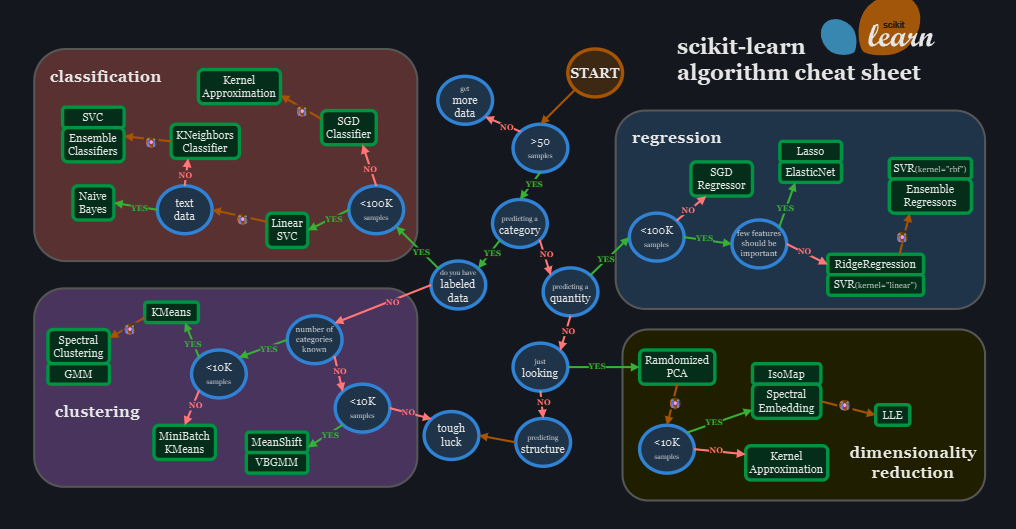

In [64]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#Setup Random Seed
np.random.seed(42)

#Create the data
X = california_df.drop("target",axis=1)
Y = california_df["target"]

# split it into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# load the model
model2 = RandomForestRegressor(n_estimators=100)
model2.fit(X_train,Y_train)

#evaluate RandomForestRegressor
model2.score(X_test,Y_test)

0.806652667101436

In [65]:
# Compare with ridge model
model.score(X_test,Y_test)

0.5758549611440126

## Choosing an estimators for a clssification problems
let's go to the map
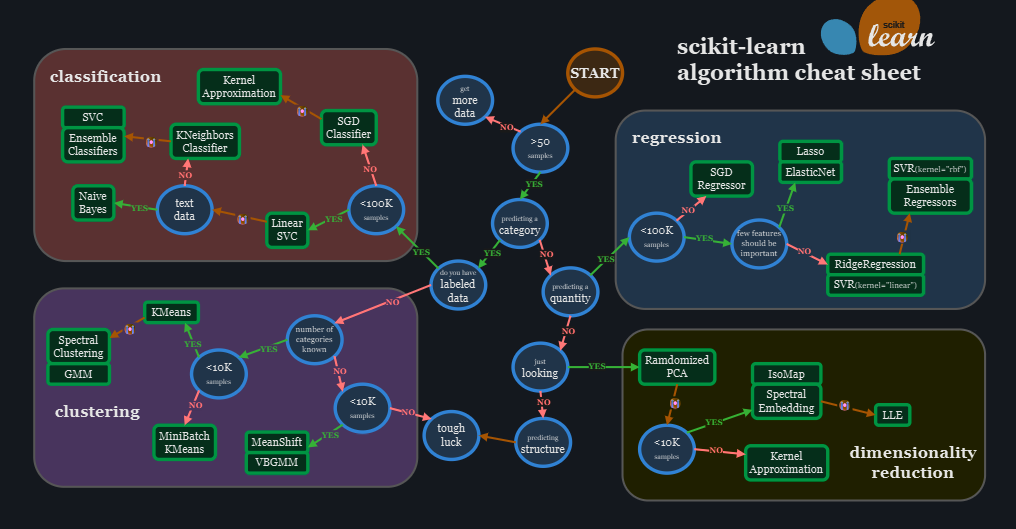

In [66]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
# Check how many sample
len(heart_disease) # > 50 Yes
# category - yes
# labeled-data - yes
# <100k data - yes - Linear SVC

303

Consulting the map and it says SVC

In [68]:
# Import Linear SVC estimator class
from sklearn.svm import LinearSVC

#Setup the random Seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

#Split the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Instantiate LinearSVC
model = LinearSVC(max_iter = 10000)
model.fit(X_train,Y_train)

#Evaluate LinearSVC
model.score(X_test,Y_test)


0.8688524590163934

In [69]:
# Import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup the random Seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

#Split the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Instantiate RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,Y_train)

#Evaluate LinearSVC
model.score(X_test,Y_test)


0.8524590163934426

TidBit:
1. if you have structured data,use ensemble methods
2. if you have unstructured data,use deeplearning or tranfer learning

In [70]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3.FIT THE MODEL / ALGORITHM and USE IT TO PREDICT DATA
### 3.1 FIT THE MODEL/ALGORITHM
Diffrent names for:
* `X` = features,feature_variables,data
* `Y` = labels,targets,target variables

In [71]:
# Import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup the random Seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

#Split the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Instantiate RandomForestClassifier
model = RandomForestClassifier()

#Fit the model to the data (training the machine learning model)
model.fit(X_train,Y_train)

#Evaluate RandomForestClassifier(use the patterns the model has learned
model.score(X_test,Y_test)


0.8524590163934426

In [72]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Random Forest model deep dive
-- These Resourses will help you understand what's happening inside the Random Forest Models
we've been using. -- 

* Random Forest Wikipedia
* Random Forest in python by yhat
* An implementation and Explanation of the Random Forest in python by will koehrsen

## Make predictions using the machine learning model

#### 2 Ways to make predictions
1. `predict()`
2. `predict_proba()`

In [73]:
# Use a trained model to make predictions
model.predict(np.array([1,7,8,3,4])) # this doesn't work

C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [74]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [75]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [76]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [77]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds == Y_test)

np.float64(0.8524590163934426)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_preds)

0.8524590163934426

In [79]:
model.score(X_test,Y_test)

0.8524590163934426

### Make predictions with `predict_proba()`

In [80]:
# predict_proba() returns prabablities of a classification label

In [81]:
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [82]:
# Let's preidict() on the same data...
model.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [83]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can be also used in regression models

In [84]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [85]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X = california_df.drop("target",axis = 1)
Y = california_df["target"]

# Split data in to train,testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Fit the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

# Predictions
Y_preds = model.predict(X_test)

# test the model
model.score(X_test,Y_test)

0.806652667101436

In [86]:
Y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [87]:
np.array(Y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [88]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,Y_preds)

0.32656738464147306

## 4.Evaluating a machine learning model

Three ways to evaluate Scikit-Learn Models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-Specific metric functions

In [89]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train,Y_train)



RandomForestClassifier()

## 4.1 Evaluating a model with the score method

In [90]:
model.score(X_train,Y_train)

1.0

In [91]:
model.score(X_test,Y_test)

0.8524590163934426

### 4.2 Evaluating a model using scoring parameter

In [92]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
Y = heart_disease['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

model = RandomForestClassifier(n_estimators=100);
model.fit(X_train,Y_train);


                

In [93]:
model.score(X_test,Y_test)

0.8524590163934426

In [94]:
cross_val_score(model,X,Y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

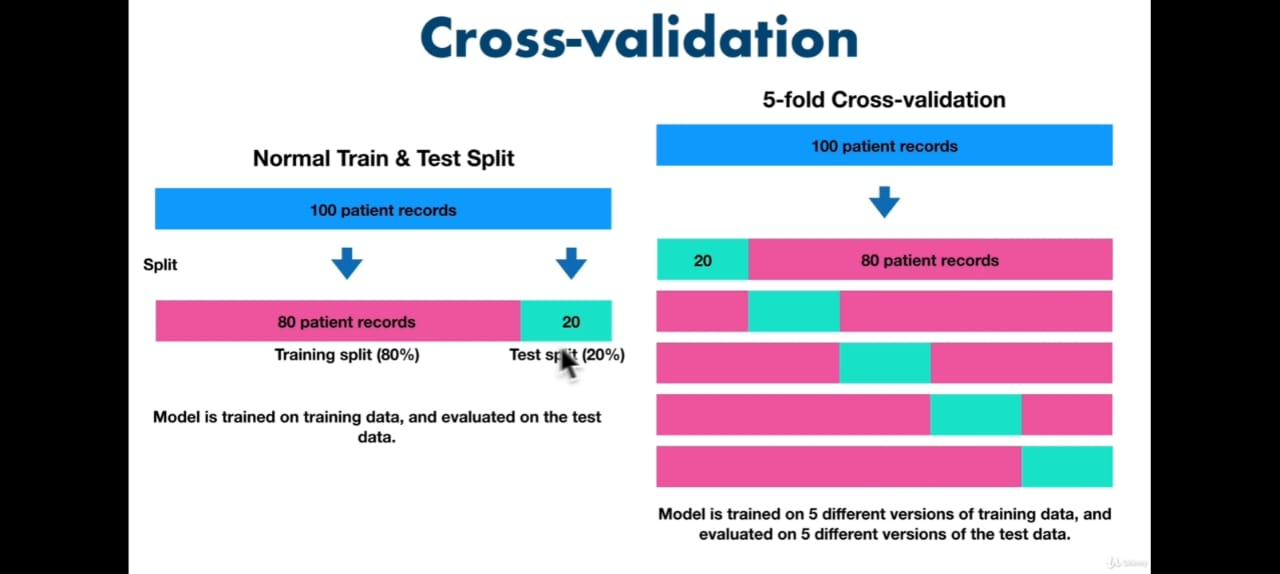

In [95]:
cross_val_score(model,X,Y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [96]:
# Let's compare with normal score using mean
clf_single_score = model.score(X_test,Y_test);

clf_cross_val_score = np.mean(cross_val_score(model,X,Y,cv=5))

clf_single_score,clf_cross_val_score

(0.8524590163934426, np.float64(0.8281420765027322))

In [97]:
# Default scroing parameter of classifier = mean_accuracy
model.score(X_test,Y_test)

0.8524590163934426

In [98]:
# Scoring parameter set to none by default
cross_val_score(model,X,Y,cv=5,scoring=None) # Estimators default scoring parameter is used when scoring is set to none here classifier use mean accuracy

array([0.78688525, 0.90163934, 0.78688525, 0.81666667, 0.8       ])

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area Under ROC curve
3. Confusion matrix
4. Classification Report

**Accuracy**

In [99]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

model = RandomForestClassifier()
cross_val_score = cross_val_score(model,X,Y,cv=5)

In [101]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [102]:
print(f"Heart Disease Classifier Cross-Validated Accuracy:{np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy:82.48%


## Area Under ROC(Receiver Operationg Charteristic) Curve(AUC)

* Area Under Curve(AUC)
* ROC Curve

  ROC Curve are a comparision of a model's true positive rate(tpr) verses a models flase positive rate(fpr)

  * True positive = model predicts 1 when truth is 1
  * False Positive = model predicts 1 when truth is 0
  * True Negative = model predicts 0 when truth is 0
  * False Negative = model predict 0 when truth is 1

In [103]:
# Create train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Fit the model
model.fit(X_train,Y_train)

RandomForestClassifier()

In [104]:
from sklearn.metrics import roc_curve

# Make prediction with probablities
y_probs = model.predict_proba(X_test)

y_probs[:10],len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [105]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [106]:
# Calculate fpr,tpr and thresolds
fpr,tpr,thresolds = roc_curve(Y_test,y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

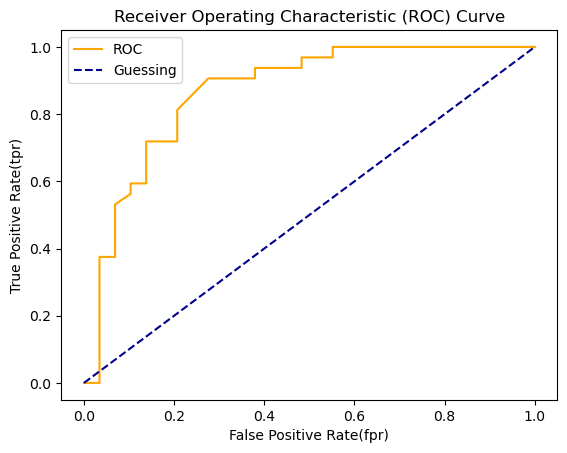

In [107]:
# Create a function for plotting ROC Curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr) and true postive rate(tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")

    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle='--',label="Guessing")

    #Customize the plot
    plt.xlabel("False Positive Rate(fpr)")
    plt.ylabel("True Positive Rate(tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [108]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_probs_positive)

np.float64(0.8669181034482759)

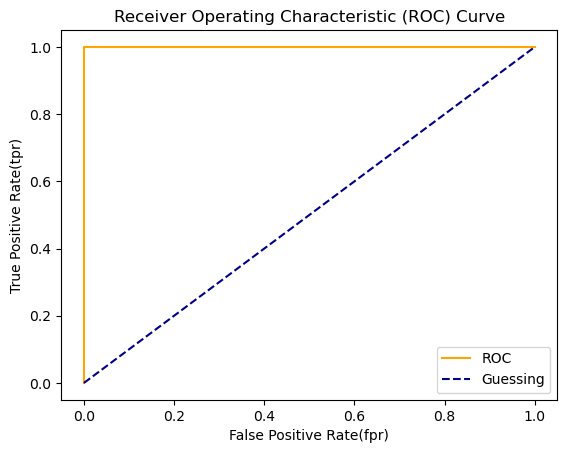

In [109]:
# Plot perfet ROC curve and AUC score
fpr,tpr,thresolds = roc_curve(Y_test,Y_test)
plot_roc_curve(fpr,tpr)

In [110]:
# Perfect AUC Score
roc_auc_score(Y_test,Y_test)

np.float64(1.0)

## Confusion Matrix

A Confusion matrix is a quick way  to compare the labels a model predicts and the actual labels it was supposed to predict.

in essence giving you an idea of where the model is getting confused.

In [111]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(Y_test,y_preds)

array([[29,  0],
       [ 1, 31]])

In [112]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(Y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,29,0
1,1,31


In [113]:
28+1+1+31

61

In [114]:
len(X_test)

61

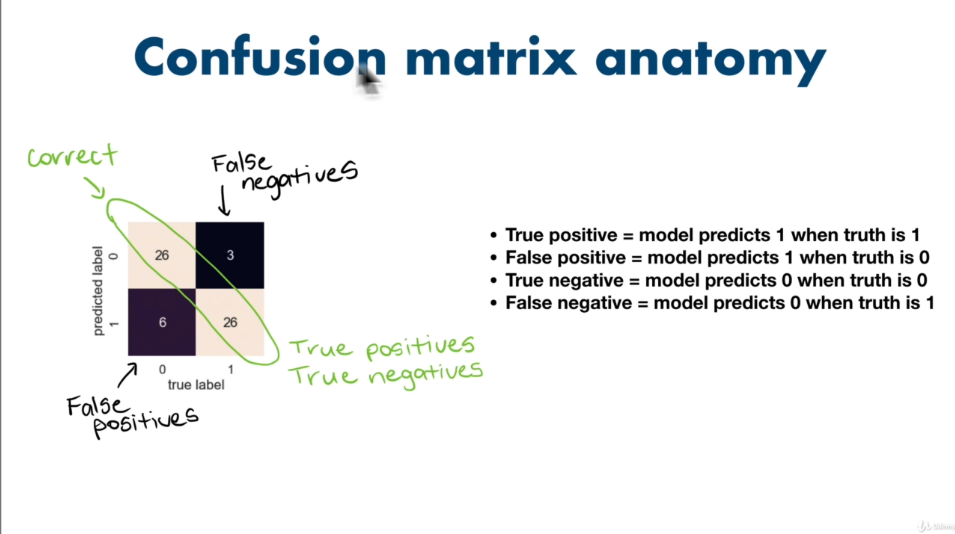

TO INSTALL WITHIN JUPYTER NOTBOOK into the current environment
type-

* import sys
* !conda install --yes-- --prefix {sys.prefix} seaborn

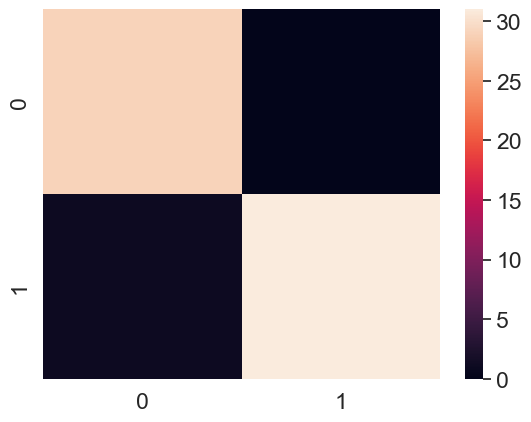

In [115]:
# Make our confusion matrix more visual with seaborn heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(Y_test,y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat);

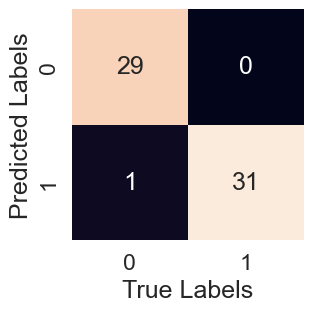

In [116]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig,ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annonate the boxes with conf_mat info
                    cbar=False
                    )
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")

    # Fix the broken annotations (this happened in matplotlib 3.1.1)
    # bottom,top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5,top-0.5);
    # (here it will ruin the anntations)
plot_conf_mat(conf_mat)

In [117]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\__init__.py)

**Classification Report**

In [118]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        32

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



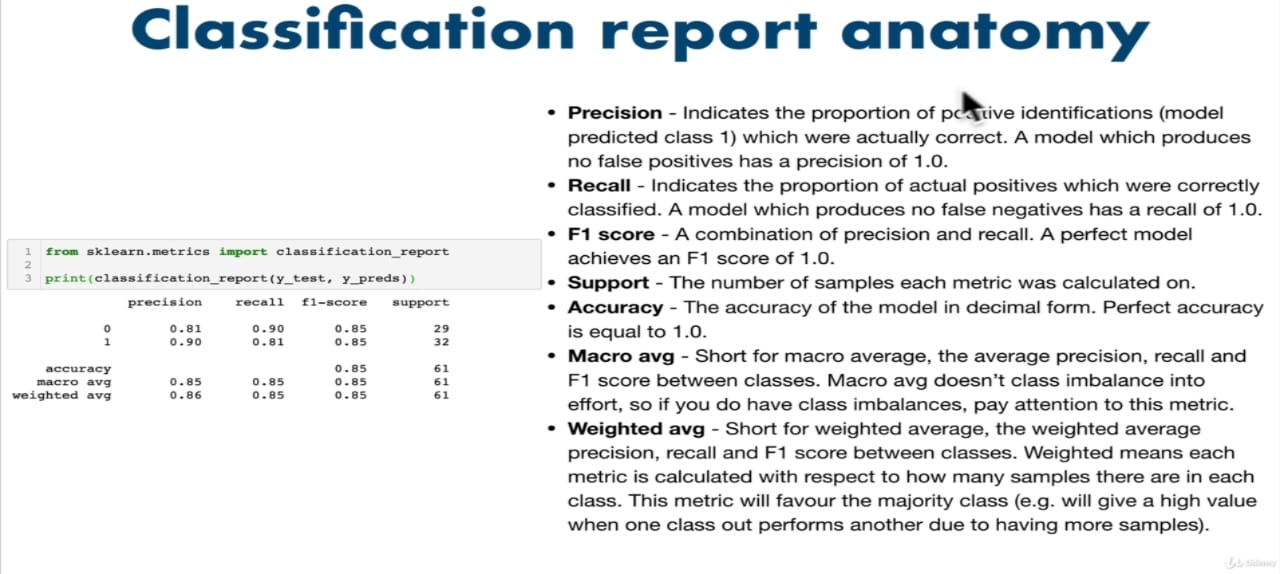


In [119]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_pred = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_pred,output_dict=True))

C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To Summarize classification metrics:
* **Accuracy** is a good measure to start with if all classes are balanced(e.g. same amount of samples which are labelled with 0 or 1).
* **Precision and recall** become more important when classes are imbalanced.
* if false positive predictions are worse than false negatives,aim for higher precision.
* if false negative predictions are worse than false positives,aim for higher recall.
* **F1-Score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

* Documetations - https://scikit-learn.org/stable/modules/model_evaluation.html
1. R^2 (pronounced r-squared) or  cofficient of determination
2. Mean absolute error(MAE)
3. Mean Squared error(MSE)

**R^2**

Compares your models predictions to the mean of the target.Values can range form negative infinity(a very poor model) to 1.For example,if all your model does is predict the mena of the target,it's R^2 value would be 0.And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [120]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = california_df.drop('target',axis=1)
Y = california_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [121]:
model.score(X_test,Y_test)

0.806652667101436

In [122]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(Y_test),Y_test.mean())

In [123]:
Y_test.mean()

np.float64(2.0550030959302323)

In [124]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [125]:
r2_score(Y_test,y_test_mean) # Model only predicting the mean gets an R^2 score of 0.

0.0

In [126]:
r2_score(Y_test,Y_test) # Model predicting perfectly  the correct value gets an R^2 score of 1.

1.0

### Mean Absolute Error(MAE)
MAE is the average of the absolute diffrences between predictions and actual values.It gives you and idea of how wrong your model predictions are.

In [127]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test,y_preds)
mae

0.32656738464147306

In [128]:
df = pd.DataFrame(data={"Actual values":Y_test,
                       "Predicted Values":y_preds})
df["diffrences"] = df["Predicted Values"] - df["Actual values"]
df

,Actual values,Predicted Values,diffrences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.219830,-0.413170
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


### Mean Squared Error(MSE)


In [129]:
# Mean Squared Error
from sklearn.metrics  import mean_squared_error

mse = mean_squared_error(Y_test,y_preds)
mse

0.25336408094921037

In [130]:
# Calculate MAE by Hand
df["diffrences"].abs().mean()

np.float64(0.32656738464147306)

In [131]:
# Calculate MSE by Hand
sq = np.square(df["diffrences"])
sq.mean()

np.float64(0.25336408094921037)

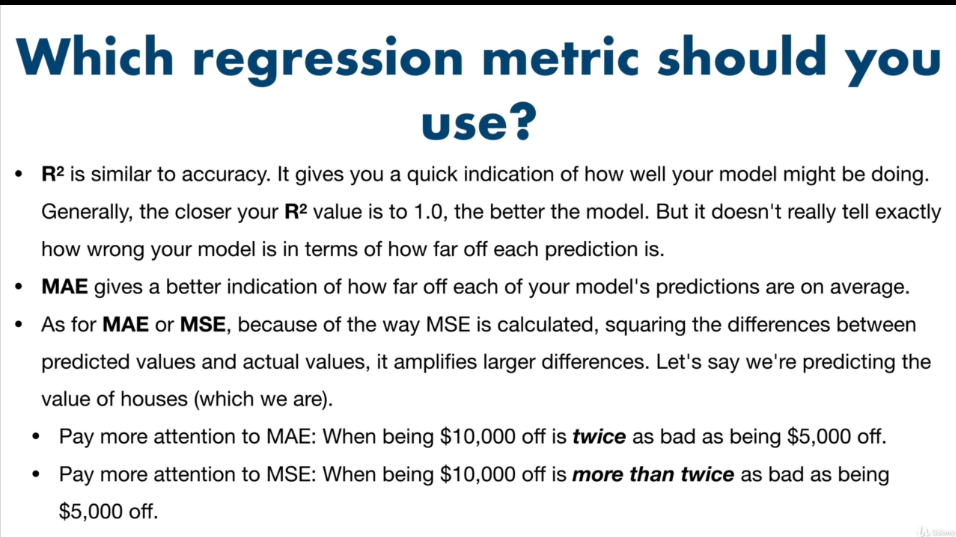

minimize MSE and MAE and maximize R^2

<p>Evaluating the results of a machine learning model is as important as building one.</p><p>But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.</p><p>Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.</p><p><strong>Classification Model Evaluation Metrics/Techniques</strong></p><ul><li><p><strong>Accuracy</strong> - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" rel="noopener noreferrer" target="_blank"><strong>Precision</strong></a> - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" rel="noopener noreferrer" target="_blank"><strong>Recall</strong></a> - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" rel="noopener noreferrer" target="_blank"><strong>F1 score</strong></a> - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.</p></li><li><p><a href="https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/" rel="noopener noreferrer" target="_blank"><strong>Confusion matrix</strong></a><strong> </strong>- Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).</p></li><li><p><a href="https://scikit-learn.org/stable/modules/cross_validation.html" rel="noopener noreferrer" target="_blank"><strong>Cross-validation</strong></a> - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average. </p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html" rel="noopener noreferrer" target="_blank"><strong>Classification report</strong></a><strong> </strong>- Sklearn has a built-in function called <code>classification_report()</code> which returns some of the main classification metrics such as precision, recall and f1-score.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html" rel="noopener noreferrer" target="_blank"><strong>ROC Curve</strong></a> - Also known as <a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic" rel="noopener noreferrer" target="_blank">receiver operating characteristic</a> is a plot of true positive rate versus false-positive rate.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html" rel="noopener noreferrer" target="_blank"><strong>Area Under Curve (AUC) Score</strong></a><strong> </strong>- The area underneath the ROC curve. A perfect model achieves an AUC&nbsp;score of 1.0.</p></li></ul><p><strong>Which classification metric should you use?</strong></p><ul><li><p><strong>Accuracy</strong> is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).</p></li><li><p><strong>Precision</strong> and <strong>recall </strong>become more important when classes are imbalanced.</p></li><li><p>If false-positive predictions are worse than false-negatives, aim for higher precision.</p></li><li><p>If false-negative predictions are worse than false-positives, aim for higher recall.</p></li><li><p><strong>F1-score</strong> is a combination of precision and recall.</p></li><li><p>A confusion matrix is always a good way to visualize how a classification model is going.</p></li></ul><p><strong>Regression Model Evaluation Metrics/Techniques</strong></p><ul><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html" rel="noopener noreferrer" target="_blank"><strong>R^2 (pronounced r-squared) or the coefficient of determination</strong></a> - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. </p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html" rel="noopener noreferrer" target="_blank"><strong>Mean absolute error (MAE)</strong></a> - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.</p></li><li><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" rel="noopener noreferrer" target="_blank"><strong>Mean squared error (MSE)</strong></a> - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).</p></li></ul><p><strong>Which regression metric should you use?</strong></p><ul><li><p><strong>R2</strong> is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your <strong>R2</strong> value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.</p></li><li><p><strong>MAE</strong> gives a better indication of how far off each of your model's predictions are on average.</p></li><li><p>As for <strong>MAE</strong> or <strong>MSE</strong>, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).</p><ul><li><p>Pay more attention to MAE: When being $10,000 off is <strong><em>twice</em></strong> as bad as being $5,000 off.</p></li><li><p>Pay more attention to MSE: When being $10,000 off is <strong><em>more than twice</em></strong> as bad as being $5,000 off.</p></li></ul></li></ul><p>For more resources on evaluating a machine learning model, be sure to check out the following resources:</p><ul><li><p><a href="https://scikit-learn.org/stable/modules/model_evaluation.html" rel="noopener noreferrer" target="_blank">Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)</a></p></li><li><p><a href="https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c" rel="noopener noreferrer" target="_blank">Beyond Accuracy: Precision and Recall by Will Koehrsen</a></p></li><li><p><a href="https://stackoverflow.com/a/37861832" rel="noopener noreferrer" target="_blank">Stack Overflow answer describing MSE (mean squared error) and RSME&nbsp;(root mean squared error)</a></p></li></ul>

## 4.23 `scoring` Parameter

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [133]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [134]:
# Cross-validate accuracy
print(f'The Cross-Validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The Cross-Validated accuracy is: 82.48%


In [135]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [136]:
print(f'The Cross-Validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The Cross-Validated accuracy is: 82.48%


In [137]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
np.mean(cv_precision)

np.float64(0.8329547346025924)

In [138]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
np.mean(cv_recall)

np.float64(0.8545454545454545)

In [139]:
# F1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
np.mean(cv_f1)

np.float64(0.8231854226519981)

How about our regression model?


In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = california_df.drop("target",axis=1)
y = california_df["target"]

model = RandomForestRegressor(n_estimators = 100)

In [141]:
np.random.seed(42)
cv_acc = cross_val_score(model,X,y,cv=5,scoring=None)
cv_acc

array([0.51688816, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [142]:
np.random.seed(42)
cv_acc = cross_val_score(model,X,y,cv=5,scoring="r2")
cv_acc
np.mean(cv_acc)

np.float64(0.6521550148270838)

In [143]:
# Mean absolute error
cv_mae = cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae
# why neg?
# All scores obejcts follow the convention that Higher return values are better than lower return values.
# Higher this are closer to the zero the better they are

array([-0.53907598, -0.41186259, -0.43893047, -0.464205  , -0.47454934])

In [144]:
# Mean Squared Error
cv_mse = cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
cv_mse

array([-0.52564242, -0.34426975, -0.37057463, -0.44302547, -0.46310656])

In [145]:
np.mean(cv_mse)

np.float64(-0.4293237662571829)

### 4.3 Using diffrent evalution metrics as Scikit learn Functions

**Classification evaluation functions**

In [146]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Make Predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_preds)}")
print(f"Recall:{recall_score(y_test,y_preds)}")
print(f"f1:{f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy:85.25%
Precision:0.8484848484848485
Recall:0.875
f1:0.8615384615384616


**Regression evaluation function**

In [147]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = california_df.drop("target",axis=1)
y = california_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2:{r2_score(y_test,y_preds)}")
print(f"MAE:{mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")

Regression model metrics on the test set
R^2:0.806652667101436
MAE:0.32656738464147306
MSE:0.25336408094921037


## Improve a model

- First predictions = baseline predictions.
- First Model = baseline model.

From a data perspective:
* Could we collect more data?(generally,the more data,the better)
* Could we improve our data?

From a modep perspective:
* is there a better model that we can use?
* could we improve the current model?


Hyperparameters vs Parameters
* parameters = model find these patterns in data
* HyperParameters = settings on a model you can adjust to(potentially) improve its ability to find patterns


Three wayss to adjust hyperparametes:
1. By Hand
2. Random with RandomSearchCV
3. Exhastively with GridSearchCV

In [148]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [149]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

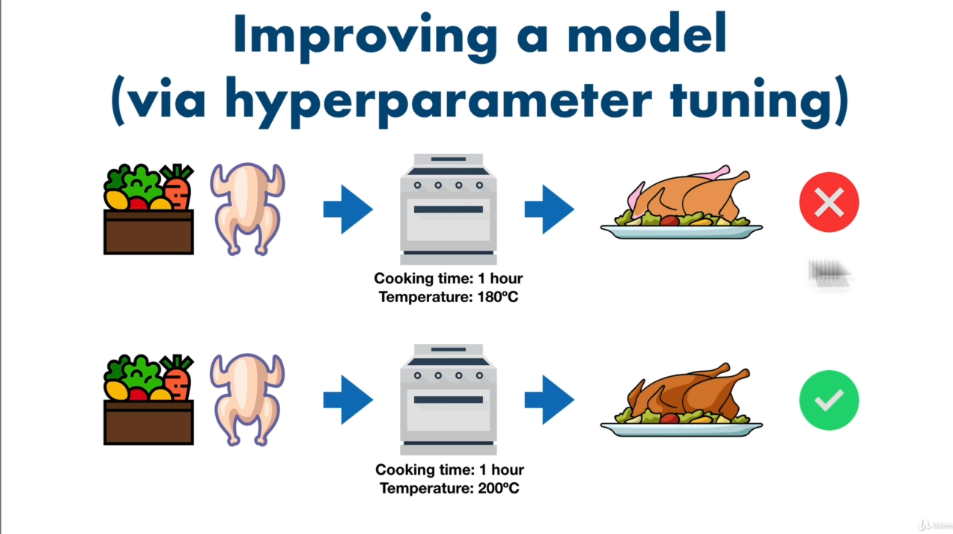

### 5.1 Tuning Hyperparameter by hand 
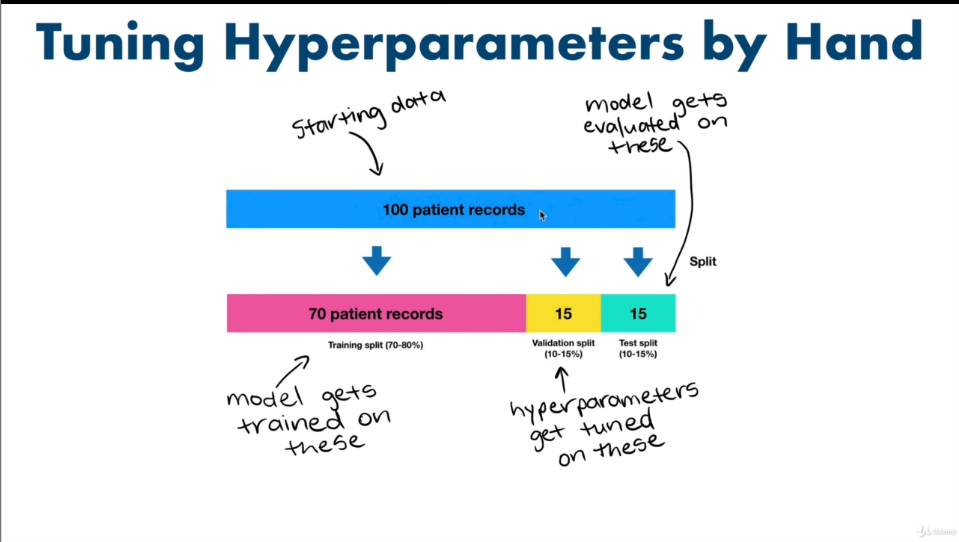

 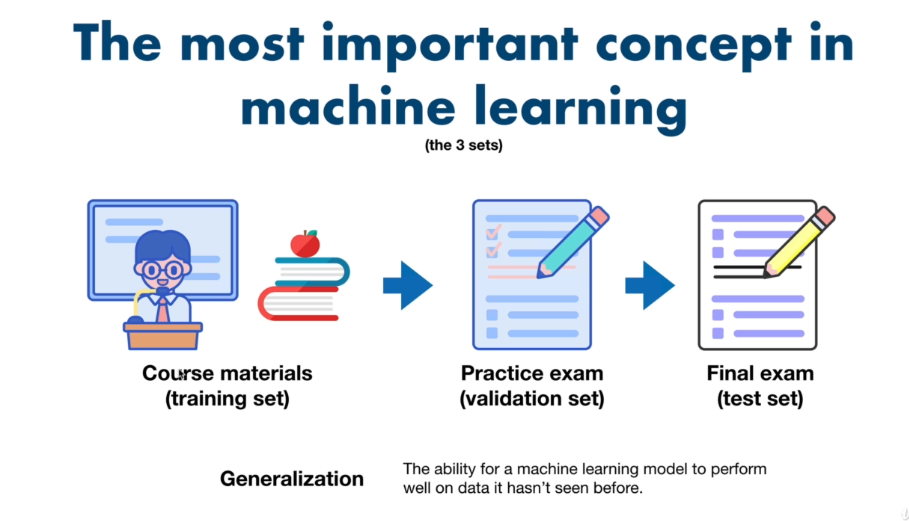

Let's make 3 set training,validation and test

In [150]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [151]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparision on y_true labels vs. y_pred labels
    """

    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)

    metric_dict = {
        "accuracy":round(accuracy,2),
        "precision":round(precision,2),
        "recall":round(recall,2),
        "f1":round(f1,2)
    }
    print(f"Acc:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 score:{f1:.2f}")

    return metric_dict

In [152]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and Y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train,validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split +  0.15*len(heart_disease_shuffled)) #15% of data
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier( )
clf.fit(X_train,y_train)

# make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc:82.22%
Precision:0.81
Recall:0.88
F1 score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [153]:
clf.get_params() ## Baselilne parameter

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [154]:
np.random.seed(42)

# Create a second classifier with diffrent hyperparmaeters
clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(X_train,y_train)

# Make predictions with diffrent hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd Classifier
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

Acc:82.22%
Precision:0.84
Recall:0.84
F1 score:0.84


In [155]:
clf_3 = RandomForestClassifier(n_estimators=100,max_depth=10)
clf_3.fit(X_train,y_train)

# Make predictions with diffrent hyperparameters
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the 3rd classifier
clf_3_metrics = evaluate_preds(y_valid,y_preds_3)


Acc:82.22%
Precision:0.84
Recall:0.84
F1 score:0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [159]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]
       }
np.random.seed(42)

# Split it into X & Y
X =  heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter = 100, # Number of models to try
                           cv = 5,
                           verbose=2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1

C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=100,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [160]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [161]:
 # Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc:81.97%
Precision:0.76
Recall:0.89
F1 score:0.82


### 5.3 Hyperparameter tuning with GridSearchCV

In [162]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [164]:
(6*5*2*3*3)*5 # 5-for cross validated

2700

In [165]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None, 5],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [2, 6],
         'min_samples_leaf': [1, 2]}

3*2*2*2*2*5

240

In [166]:
from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)
# Split it into X & Y
X =  heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv = 5,
                           verbose=2)
# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2,

C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\akash\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [167]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [168]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


Let's compare our diffrent models metrics

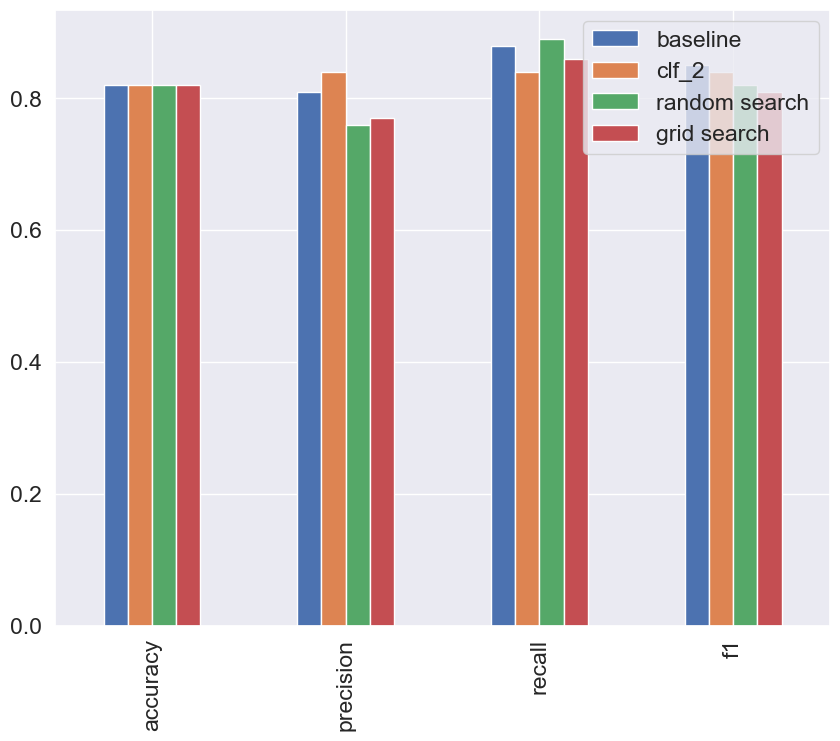

In [170]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                               "clf_2":clf_2_metrics,
                                "random search":rs_metrics,
                                "grid search":gs_metrics
                               })
compare_metrics.plot.bar(figsize=(10,8));

### Correlation Analysis
- Correlation Analysis mean which attributes have correlations
- one colum
#### Forward/Backward Attribute Selections
- We can try training our model using diffrent techniques backward attributes selection essentially says train the model on all the attributes and then slowly to start taking away attributes or columns to train you model.
- it does that affect your model it improve the model
- forward attribute selection is the opposite.Start with just one column when you train the model and keep adding one attribute at a time untill you get accaracy to plateau.
- Keep increasing columns and let's say after fifth column all the other attributes don't improve the model then we might not need it.
- this correlation analysis and forward and backward attribute selections are all ways to test our model and reduce the data if we want to and play with our model instead of assuming if we include everything make the model better that not the case everytime.

## 6.Save and load the trained model
Two ways to save and load machine learning model
1. with Python's `pickly` module
2. With the `joblib` module

**Pickle**

In [172]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open("grid_search_random_forest_model_1.pkl","wb"))

In [173]:
# Load a saved model
loaded_pickle_model = pickle.load(open("grid_search_random_forest_model_1.pkl","rb"))

In [174]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

In [175]:
from joblib import dump,load

# Save model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [179]:
# Load a saved model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [181]:
# Make some predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7 Putting it all together

In [182]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [183]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [184]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

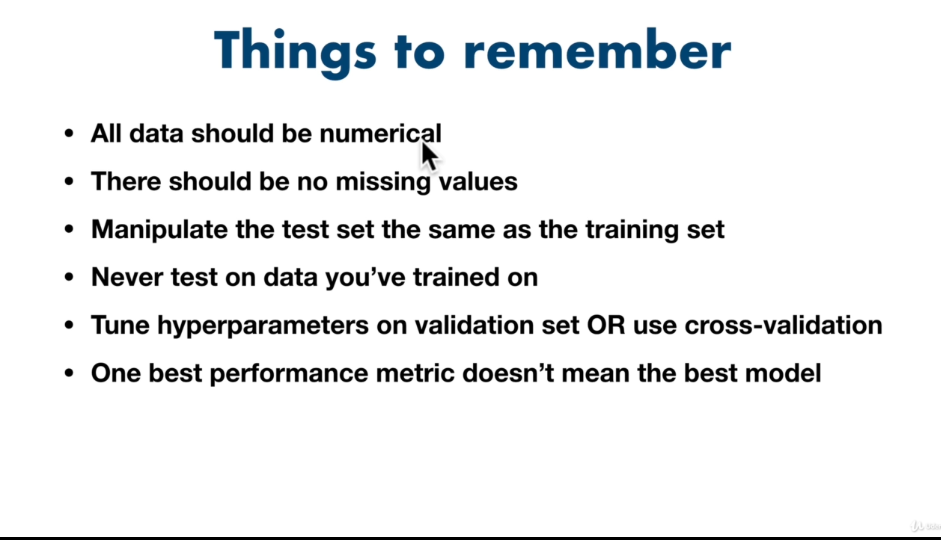

Steps we want to do(all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build the model on the data

In [198]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define diffrent features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_tranformer = Pipeline(steps=[
     ("imputer",SimpleImputer(strategy="constant",fill_value=4))                      
    ])
numeric_features = ["Odometer (KM)"]
numeric_tranformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (Fill missing values and convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat",categorical_transformer,categorical_features),
        ("door",door_tranformer,door_features),
        ("num",numeric_tranformer,numeric_features)
    ]
) 

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestRegressor())
])

# Split data
X = data.drop("Price",axis=1)
y = data["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

It's also possilbe to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipline`

In [206]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    # "model__max_features":[auto],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)
# preprocessor__num__imputer__strategy = preprocessor->num->imputer->strategy

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=None, model__min_samples_spli

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [208]:
gs_model_preds = gs_model.predict(X_test)
gs_model.score(X_test, y_test)
+

0.3339554263158365

For Practice and Information Goto Scikitlearn User_guide
https://scikit-learn.org/stable/user_guide.html